In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sb

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

%matplotlib inline

#Read File
data = pd.read_csv('Melbourne_housing_FULL.csv')

# Number of rows and columns
print(data.shape)

#data.dropna(inplace=True)
data.head(10)

(34857, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


# Explore Data
We will begin what kind of data that we have and if we need to make any adjustments to our data set. 

In [2]:
print(data.info())
for i in data.columns:
    print(data[i].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [3]:
data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Time to check our to see if we have any NANS in our data set. 

In [4]:
from sklearn.impute import SimpleImputer
data.dropna(inplace=True)
#data = data.fillna(data.mean())
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#data = imp_mean.fit(data[data.columns])

Text(0.5, 1.0, 'Variable Correlation')

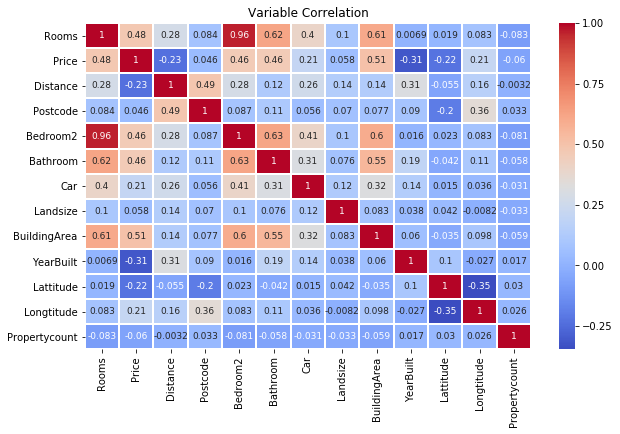

In [5]:
#Help from:
#https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression
plt.figure(figsize=(10,6))
sb.heatmap(data.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

High co-relativity between bedroom2 and rooms (most likely due to how they are both dealing with room types).

Price + Bathroom, Price + Bedroom2, Price + Bathroom, Bathroom + Room, Bathroom + Bedroom all have good co-relativity to each other as well. 
Bedroom 2 and Bathroom seem to have the same variable correlation to Price, so they may contain the same data. Lets see if we can drop one of them.
They also seem to have the same co-relation to Rooms, so lets check for that as well. 

In [6]:
data['Bed v Bath'] = data['Bedroom2']-data['Bathroom']
data['Bed v Bath'].value_counts()

 1.0    3896
 2.0    3632
 0.0     823
 3.0     487
 4.0      26
-1.0      15
-2.0       4
 5.0       3
 7.0       1
Name: Bed v Bath, dtype: int64

They are different enough to keep, but still relatively close to one another, probably no reason to use both of them for the model but they will keep some variance.

In [7]:
data['Room v Bed'] = data['Rooms']-data['Bedroom2']
data['Room v Bed'].value_counts()

 0.0    8522
 1.0     239
-1.0      82
 2.0      23
-2.0      12
 3.0       5
-6.0       1
-5.0       1
-3.0       1
 4.0       1
Name: Room v Bed, dtype: int64

They are same enough to get rid of one. 

In [8]:
data = data.drop(['Bedroom2', 'Room v Bed', 'Bed v Bath'], 1)

We have a date object, let us convert it to the dates and retrieve a list of numbers ranging from youngest to oldest.

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Year'] = 2019 - data['Year']
data['YearBuilt'] = 2019 - data['YearBuilt']

# Identify historic homes
data['Historic'] = np.where(data['YearBuilt']>=50,'Historic','Contemporary')
# Convert to Category
data['Historic'] = data['Historic'].astype('category').cat.codes

sb.set(style="whitegrid")

#retrieve all columns 
numerical = data.select_dtypes(include = [np.number])

fig, axes = plt.subplots(4, 3, figsize=(12, 12))

for idx, feat in enumerate(numerical.columns.difference(['Price'])):
    ax = axes[int(idx / 3), idx%3]
    sb.scatterplot(x=feat, y='Price', data=numerical, ax=ax);
    ax.set_xlabel(feat)
    ax.set_ylabel('Price')
    
fig.tight_layout();

Here we can use this model to gauage the relative average

In [10]:
# Identify numeric features
data.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Year'],
      dtype='object')

In [11]:
for i in data.columns:
    if data.dtypes[i] == 'object':
        data[i] = data[i].astype('category').cat.codes

# Create Non-Feature Selected Dataset

In [12]:
target = data.Price.copy()
#Drop Price, as well as Longtitude and Lattitude due to negative values
selected_data = data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Propertycount', 'Historic']]
selected_data.head(10)

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,Historic
2,2,2.5,1.0,0.0,156.0,79.0,4019.0,1
4,3,2.5,2.0,0.0,134.0,150.0,4019.0,1
6,4,2.5,1.0,2.0,120.0,142.0,4019.0,0
11,3,2.5,2.0,0.0,245.0,210.0,4019.0,1
14,2,2.5,1.0,2.0,256.0,107.0,4019.0,1
18,2,2.5,1.0,2.0,220.0,75.0,4019.0,1
24,3,2.5,2.0,2.0,214.0,190.0,4019.0,0
25,2,2.5,2.0,1.0,0.0,94.0,4019.0,0
30,2,2.5,1.0,2.0,238.0,97.0,4019.0,1
32,3,2.5,2.0,1.0,113.0,110.0,4019.0,1


# Create Data Set

In [13]:
#Create our testing and training data set, with spread of 70% in training and 30% in testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size=0.3, random_state=20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )

import time
start_time = time.time() 
reset_time = time.time() - start_time

C:\Users\ronal\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ronal\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  


# Random Decision Tree

import time

start_time = time.time()
reset_time = time.time() - start_time

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
#Create a generic random forest tree
rfc = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_features = 'auto',
    max_depth = 2 ,
    n_estimators = 2,
    n_jobs=-1
    )

from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [20, 40, 60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1, 2, 3],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
gd_sr = GridSearchCV(estimator=rfc,  
                     param_grid=parameters,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)  
best_result = gd_sr.best_score_  
print("Best Accuracy: ", best_result)  
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

# Linear Regression

In [14]:
from sklearn import linear_model
from sklearn.metrics import r2_score
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.03101491928100586 seconds ---


# Ridge Regression

In [15]:
ridgeregr = linear_model.Ridge(alpha=500, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)

# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = ridgeregr.predict(X_train)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
ridgetable = pd.crosstab(y_train, pred_y_statsmod)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.02599787712097168 seconds ---


# Lasso Regression

In [16]:
lassregr = linear_model.Lasso(alpha= 500)
lassregr.fit(X_train, y_train)

# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = lassregr.predict(X_train)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
lasstable = pd.crosstab(y_train, pred_y_statsmod)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.02501368522644043 seconds ---


# Evalaute Regular Data Models

In [17]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error
from math import sqrt

model_names = [lin_regr,ridgeregr,lassregr]
for model_name in model_names:
    print('\n\nModel Type: ', model_name)
    print('\nWith 20% Holdout: ' + str(model_name.fit(X_train, y_train).score(X_test, y_test)))
    print('Testing on Sample: ' + str(model_name.fit(selected_data, target).score(selected_data, target)))

    print('\nCross Validation')
    print(cross_val_score(model_name, selected_data, target, cv=10))

    # The mean squared error
    prediction = model_name.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, prediction))
    print('\nRoot Mean Square:', rms)
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % r2_score(y_test, prediction))
    print("--- %s seconds ---" % (time.time() - start_time - reset_time))
    reset_time = time.time() - start_time



Model Type:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

With 20% Holdout: 0.48540884795880557
Testing on Sample: 0.5084993968923367

Cross Validation
[0.4275136  0.59397526 0.57037963 0.48288582 0.51178218 0.4744461
 0.35105856 0.46253941 0.46449686 0.51867743]

Root Mean Square: 1186786.2475974888

Variance score: -2.03
--- 0.0500025749206543 seconds ---


Model Type:  Ridge(alpha=500, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

With 20% Holdout: -2.0848636364342448
Testing on Sample: 0.5055471050742115

Cross Validation
[0.41163463 0.59918135 0.5703636  0.48353237 0.52126495 0.4721583
 0.34672914 0.45047953 0.46751759 0.50523803]

Root Mean Square: 1221294.1807100824

Variance score: -2.21
--- 0.03401637077331543 seconds ---


Model Type:  Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_st

Comparing these four data sets, we can already observe a few errors. For one our models are only able to achieve a maximum of 45% accuracy in predicting the right data set, based on the holdout/test sample. Furthermore there is a very high fluctuation in our cross validation which indicates overfitting through all the different model types, which indicated a large amount of overfitting. In terms of model accuracy it is safe to say that out of these four data types, the random forest is the least effective at being able to gauage the correct pricing based on the variables provided to it. This makes sense because for one the random forest doesnt have much depth/leaves (this is due to hardware limitations), and also random forest models are better used in predicting categorical vs continuous data. Although my machine at the time of creating these models isn't sufficient enough to create a meaningful gradient boosted model or a SVM, it is safe to say that the results of the random forest tree will likely be highly similar to the results that would be displayed if I were to run SVM or gradient boost. For continuous data, linear regression, lasso regression and ridge regression works the best, and this idea is supported by the accuracy the root mean square value, the hold out and variance score. 

The hold out tells us generally how accurate our models are, and between the three linear regression models, they are overall very indentical with lasso and linear regression being slightly more accurate then ridge regression. In fact, linear and lasso are identical in this case with ridge regression slightly behind on all evaluation methods. 
The reason for this is that it is likely that for the ridge regression model, the alpha value chosen for the model was simply not the best fit for the model, which caused the model omit too much of the variance within the data, causing the accuracy to decrease. Whereas for linear regression and lasso regression, all of the features put into the model were used which explains the near identical results. 

# Select K Best

In [18]:
#Use Select K Best after using PCA to determine the number of dimensions to achieve the 2 features that have the greatest variance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=4)
selector.fit(selected_data, target)

X_new = selector.transform(selected_data)
print(X_new.shape)

selected_data.columns[selector.get_support(indices=True)]
selected_data.columns[selector.get_support(indices=True)].tolist()
#sets newdata to only contain the two features that will give us the most variance
skb_data = selected_data[selected_data.columns[selector.get_support(indices=True)].tolist()].copy()
skb_data.head(10)

(8887, 4)


,Distance,Landsize,BuildingArea,Propertycount
2,2.5,156.0,79.0,4019.0
4,2.5,134.0,150.0,4019.0
6,2.5,120.0,142.0,4019.0
11,2.5,245.0,210.0,4019.0
14,2.5,256.0,107.0,4019.0
18,2.5,220.0,75.0,4019.0
24,2.5,214.0,190.0,4019.0
25,2.5,0.0,94.0,4019.0
30,2.5,238.0,97.0,4019.0
32,2.5,113.0,110.0,4019.0


# Create SKB test/training set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(skb_data, target, test_size=0.3, random_state=20)

scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )

# Random Forest: SKB

import time

start_time = time.time()
reset_time = time.time() - start_time

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
#Create a generic random forest tree
rfc = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_features = 'auto',
    max_depth = 2 ,
    n_estimators = 2,
    n_jobs=-1
    )

from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [20, 40, 60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1, 2, 3],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
gd_sr = GridSearchCV(estimator=rfc,  
                     param_grid=parameters,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)  
best_result = gd_sr.best_score_  
print("Best Accuracy: ", best_result)  
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

# Linear Regression: SKB

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.28106260299682617 seconds ---


# Ridge Regression: SKB

In [21]:
ridgeregr = linear_model.Ridge(alpha=500, fit_intercept=False) 
ridgeregrfit = ridgeregr.fit(X_train, y_train)

# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = ridgeregrfit.predict(X_train)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
ridgetable = pd.crosstab(y_train, pred_y_statsmod)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.031007051467895508 seconds ---


# Lasso Regression: SKB

In [22]:
lassregr = linear_model.Lasso(alpha= 500)
lassregr.fit(X_train, y_train)

# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = lassregr.predict(X_train)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
lasstable = pd.crosstab(y_train, pred_y_statsmod)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.02700638771057129 seconds ---


# Evaluate: SKB Models

In [23]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error
from math import sqrt

model_names = [lin_regr,ridgeregr,lassregr]
for model_name in model_names:
    prediction = model_name.predict(X_test)
    print('\n\nModel Type: ', model_name)
    print('\nWith 20% Holdout: ' + str(model_name.fit(X_train, y_train).score(X_test, y_test)))
    print('Testing on Sample: ' + str(model_name.fit(selected_data, target).score(selected_data, target)))

    print('\nCross Validation')
    print(cross_val_score(model_name, selected_data, target, cv=10))

    # The mean squared error
    rms = sqrt(mean_squared_error(y_test, prediction))
    print('\nRoot Mean Square:', rms)
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % r2_score(y_test, prediction))
    print("--- %s seconds ---" % (time.time() - start_time - reset_time))
    reset_time = time.time() - start_time



Model Type:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

With 20% Holdout: 0.272612548368112
Testing on Sample: 0.5084993968923367

Cross Validation
[0.4275136  0.59397526 0.57037963 0.48288582 0.51178218 0.4744461
 0.35105856 0.46253941 0.46449686 0.51867743]

Root Mean Square: 581043.9831499311

Variance score: 0.27
--- 0.058013916015625 seconds ---


Model Type:  Ridge(alpha=500, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

With 20% Holdout: -2.2570961500487328
Testing on Sample: 0.5055471050742115

Cross Validation
[0.41163463 0.59918135 0.5703636  0.48353237 0.52126495 0.4721583
 0.34672914 0.45047953 0.46751759 0.50523803]

Root Mean Square: 1229536.414715826

Variance score: -2.26
--- 0.03800845146179199 seconds ---


Model Type:  Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=No

Utilizing SKB, we can see that while our models have retained the same accuracy within the cross validation and hold out tests. We can observe that there are drastic changes within the root mean square value as well as the variance. Similar to the non-feature selected models, lasso/linear regression are similar to one another and are both more accurate then ridge regression. The decision tree model is still very subpar in terms of its cross validation and hold out tests, however its variance and root mean square score is higher then those seen in the linear regression models. This is due to the fact that because there are less features to deal with, our random forest model was able to create a more "detailed" model and go more in depth with the variance in the features it was presented. 

So is the random forest model the better choice in this case compared to the linear regression models due to its higher variance score and lower root mean square value? No, because it's holdout value is still highly inaccurate in comparison to the linear model types. 

# PCA

In [24]:
from sklearn.decomposition import PCA
#Here we are setting pca to be fitted with n_components = x, until it encompasses 95% of the variance or more
pca = PCA(.95)
pca_data = pca.fit_transform(selected_data) 

print(pca.explained_variance_ratio_) #Shows how much variance the first and second dimensional space has
print(pca.explained_variance_ratio_.cumsum())  #Shows that I retain 95%+ of the variance

[0.94412367 0.05549653]
[0.94412367 0.99962019]


# Create PCA Data Set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, target, test_size=0.3, random_state=20)

scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )

# Random Forest: PCA

import time

start_time = time.time()
reset_time = time.time() - start_time

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
#Create a generic random forest tree
rfc = ensemble.RandomForestClassifier(
    criterion='entropy',
    max_features = 'auto',
    max_depth = 2 ,
    n_estimators = 2,
    n_jobs=-1
    )

from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [20, 40, 60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1, 2, 3],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
gd_sr = GridSearchCV(estimator=rfc,  
                     param_grid=parameters,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)  
best_result = gd_sr.best_score_  
print("Best Accuracy: ", best_result)  
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

# Linear Regression: PCA

In [26]:
from sklearn import linear_model
from sklearn.metrics import r2_score
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.03300929069519043 seconds ---


# Ridge Regression: PCA

In [27]:
ridgeregr = linear_model.Ridge(alpha=500, fit_intercept=False) 
ridgeregrfit = ridgeregr.fit(X_train, y_train)

# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = ridgeregrfit.predict(X_train)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
ridgetable = pd.crosstab(y_train, pred_y_statsmod)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.029013395309448242 seconds ---


# Lasso Regression: PCA

In [28]:
lassregr = linear_model.Lasso(alpha= 500)
lassregr.fit(X_train, y_train)

# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = lassregr.predict(X_train)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
lasstable = pd.crosstab(y_train, pred_y_statsmod)
print("--- %s seconds ---" % (time.time() - start_time - reset_time))
reset_time = time.time() - start_time

--- 0.021004915237426758 seconds ---


# Evaluate PCA Models

In [29]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error
from math import sqrt

model_names = [lin_regr,ridgeregr,lassregr]
for model_name in model_names:
    prediction = model_name.predict(X_test)
    print('\n\nModel Type: ', model_name)
    print('\nWith 20% Holdout: ' + str(model_name.fit(X_train, y_train).score(X_test, y_test)))
    print('Testing on Sample: ' + str(model_name.fit(selected_data, target).score(selected_data, target)))

    print('\nCross Validation')
    print(cross_val_score(model_name, selected_data, target, cv=10))

    # The mean squared error
    rms = sqrt(mean_squared_error(y_test, prediction))
    print('\nRoot Mean Square:', rms)
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % r2_score(y_test, prediction))
    print("--- %s seconds ---" % (time.time() - start_time - reset_time))
    reset_time = time.time() - start_time



Model Type:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

With 20% Holdout: 0.00838755869617236
Testing on Sample: 0.5084993968923367

Cross Validation
[0.4275136  0.59397526 0.57037963 0.48288582 0.51178218 0.4744461
 0.35105856 0.46253941 0.46449686 0.51867743]

Root Mean Square: 678417.5739661163

Variance score: 0.01
--- 0.05100274085998535 seconds ---


Model Type:  Ridge(alpha=500, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

With 20% Holdout: -2.5693069038175
Testing on Sample: 0.5055471050742115

Cross Validation
[0.41163463 0.59918135 0.5703636  0.48353237 0.52126495 0.4721583
 0.34672914 0.45047953 0.46751759 0.50523803]

Root Mean Square: 1287117.0757942568

Variance score: -2.57
--- 0.050011634826660156 seconds ---


Model Type:  Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state

With PCA, we can see that the variance score has gone down and the root mean square value has gone up. We can also observe that while the overall model still gives us in the same score and the cross validation score is roughly the same as the previous models, the accuracy of the 20% hold out score has drastically decreased. 

First off, the changges to the Variance and RMSE score is to be expected when utilizing PCA as PCA only returns the common co-related values between different features and discards the outliers. This causes the amount of variance to drop by alot and causes the variance score to decrease drastically. The holdout values changing drastically is most likely due to the hold out choosing a particulary outlandish 20% of the data which holds alot of outliers, which prevents the PCA from capturing any of the data resulting in a extremely low score for all model types.

# Conclusion

Out of all the feature selection models, having no feature selection or SKB yielded the best result. This is mostly due to the types of linear regression models we utilized. Lasso Regression and Ridge Regression have their own feature selection built in, so compounding that with more feature selection can have negative effects (like that witnessed with PCA). 

Out of the model types, Lasso and Linear regression have the highest accuracy and captures the data set the closest. 
Runtime wise, the random forest model takes much longer the the linear regression models and will only keep increasing when the dataset becomes larger. While it is possible for random forest to achieve the same accuracy as the linear regression models, it'll be at the cost of a more expensive runtime. This will also most likely be the same for SVM and Gradient Boosting models.

Based on the heatmap data, the number of rooms, bathrooms, bedrooms and where the house is located has the greatest impact on the pricing of the house. While there are other factors, they impact the price less significantly then those 4 variables. In terms of creating the model however those less significant variables are important in capturing the small nuances in the models as the data displayed isn't truly linear in nature. 